<a href="https://colab.research.google.com/github/yadicamila/Yadi-camila-almeida/blob/main/semana2/red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar dataset de ocupacion de sitios de parqueo
data=pd.read_csv("/content/SJ.csv")

In [3]:
# Revisar cabecera y cola del dataset
data.head()

,date,idCompany,numTrx
0,2022-08,1,68599
1,2022-09,1,86862
2,2022-10,1,99611
3,2022-11,1,109018
4,2022-12,1,115665


In [4]:
data.tail()

,date,idCompany,numTrx
13,2023-09,1,126851
14,2023-10,1,137539
15,2023-11,1,145327
16,2023-12,1,135537
17,2024-01,1,148111


In [5]:
# Formatear la columna de fecha como año y mes
data["date"]=pd.to_datetime(data["date"],format ='%Y-%m')
data.head()

,date,idCompany,numTrx
0,2022-08-01,1,68599
1,2022-09-01,1,86862
2,2022-10-01,1,99611
3,2022-11-01,1,109018
4,2022-12-01,1,115665


In [6]:
# Verificar el nombre de los meses del dataset para comprobar que el formateo es correcto
data["date"].dt.month_name().unique()

array(['August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June', 'July'],
      dtype=object)

In [7]:
# Contar el numero de datos del dataset
data.count()

,0
date,18
idCompany,18
numTrx,18


In [8]:
# Obtener una estadistica descriptiva básica del dataset, verificar si hay algo anormal
data.describe()

,date,idCompany,numTrx
count,18,18.0,18.000000
mean,2023-04-16 18:40:00,1.0,120111.833333
min,2022-08-01 00:00:00,1.0,68599.000000
25%,2022-12-08 18:00:00,1.0,110679.750000
50%,2023-04-16 00:00:00,1.0,125518.500000
75%,2023-08-24 06:00:00,1.0,135321.000000
max,2024-01-01 00:00:00,1.0,148111.000000
std,NaN,0.0,20840.047288


In [9]:
# Revisar si el ldataset tiene datos nullos
data.isnull().sum()

,0
date,0
idCompany,0
numTrx,0


In [10]:
# Establecer el campo fecha como index del dataframe
data.set_index("date",inplace=True)

In [11]:
# Verificar nuevamente el head de la tabla y comprobar que el index ahora sea la fecha
data.head()

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665


<Axes: xlabel='date'>

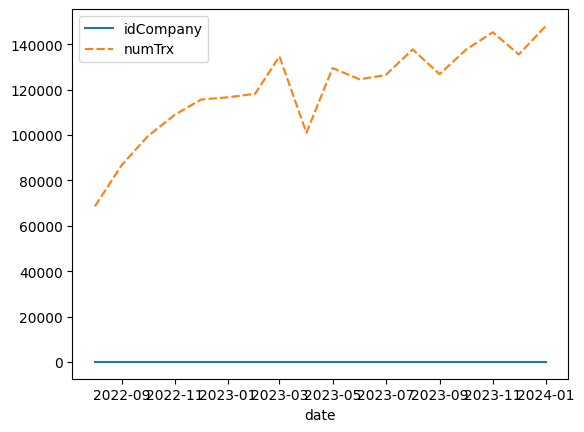

In [12]:
# Realizar una grafica de tendencia del numero de espacios ocupados en el tiempo
sns.lineplot(data=data)

In [13]:
# Eliminar las columnas que no necesiten para realizar un sistema de prediccion de ocupacion de parqueo
data2=data.drop(labels=['idCompany'],axis=1)
data2.head()

,numTrx
date,
2022-08-01,68599
2022-09-01,86862
2022-10-01,99611
2022-11-01,109018
2022-12-01,115665


In [14]:
# Escalar entre -1 y 1 los datos de la variable a predecir
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(-1,1))
datatrain_arr=scalar.fit_transform(data2)
datatest_arr=scalar.fit_transform(data2)
datatrain_arr

array([[-1.        ],
       [-0.5406228 ],
       [-0.21994164],
       [ 0.01667673],
       [ 0.18387162],
       [ 0.20920113],
       [ 0.24748466],
       [ 0.66198813],
       [-0.18507898],
       [ 0.53282523],
       [ 0.40859241],
       [ 0.45484958],
       [ 0.74019016],
       [ 0.46523795],
       [ 0.73407788],
       [ 0.92997283],
       [ 0.6837207 ],
       [ 1.        ]])

In [15]:
# Definir una ventana temporal adecuada para la prediccion y establecer las listas
# xtrain y ytrain para el entrenamiento
steps= 2
xtrain=[]
ytrain=[]
for i in range(len(datatrain_arr)-steps):
  xtrain.append(datatrain_arr[i:i+steps])
  ytrain.append(datatrain_arr[i+steps])




In [16]:
# Convertir las listas en arrays de numpy
xtrain=np.asanyarray(xtrain)
ytrain=np.asanyarray(ytrain)

In [17]:
# Verificar el shape de los datos de entrenamiento (variable independiente y dependiente)
print(xtrain.shape)
print(ytrain.shape)

(16, 2, 1)
(16, 1)


In [18]:
# Construir un modelo LSTM para realizar la predicción que tenga la siguiente arquitectura

# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 128 neuronas con activación relu
# Una capa LSTM de 64 neuronas con activación relu
# Una capa LSTM de 32 neuronas con activación relu
# Una capa LSTM de 16 neuronas con activación relu (esta seria la ultima capa LSTM)
# Agregar operaciones de Dropout de 7% despues de cada capa LSTM
# Agregar en la etapa final una red densa con dos capas con 64 neuronas y 32 neuronas
# Finalmente agregar una capa densa de salida
# Imprimir el summary del  modelo

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model=Sequential()
model.add(LSTM(units=256,return_sequences=True,activation='relu',input_shape=(20,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=256,return_sequences=True,activation='relu',input_shape=(20,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128,return_sequences=True,activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=64,return_sequences=True,activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM (units=32,return_sequences=True,activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM (units=16,return_sequences=False,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 256)             │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 20, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 20, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,058,945 (4.04 MB)

 Trainable params: 1,058,945 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compilar el modelo con una funcion de error mse y un optimizador adam
model.compile(optimizer='adam',loss='mse')

In [20]:
# Entrenar el modelo durante 100 epocas
# Usar el 10% de los datos de entrenamiento para validacion
# Usar un batch size de 16
history=model.fit(xtrain,ytrain,epochs=100, validation_split=0.1,batch_size=16, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - loss: 0.2490 - val_loss: 0.6830
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.2273 - val_loss: 0.6300
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.2057 - val_loss: 0.5746
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1848 - val_loss: 0.5167
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.1648 - val_loss: 0.4571
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.1466 - val_loss: 0.3963
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1313 - val_loss: 0.3359
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.1186 - val_loss: 0.2776
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.1148 - val_loss: 0.2248
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1131 - val_loss: 0.1825
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1184 - val_loss: 0.1554
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.1218 - v

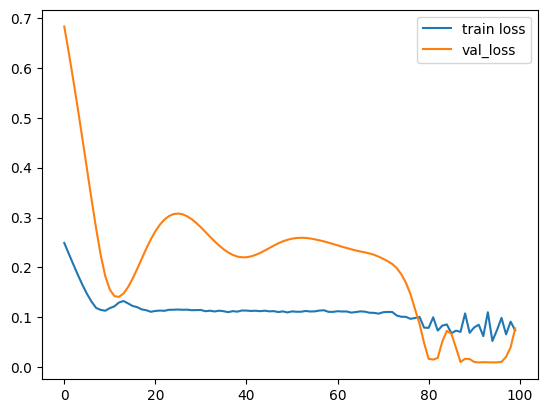

In [21]:
# Grafifcar el loss y loss de validacion para verificar que no haya overfitting
#curva de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','val_loss'])
plt.show()

In [22]:
# Guardar el modelo y salvarlo en disco
model.save('Mymodel.h5')

In [26]:
# Tome N registros historicos de su dataset y realice la predicción de ocupación para un mes particular

from sklearn.preprocessing import MinMaxScaler


data=[0.5406228 , 0.21994164]
xdata=np.asanyarray(data)

xdatapred=xdata.reshape(1,2,1)



ypred=model.predict(xdatapred)
print(ypred[0][0])
ypred=scalar.inverse_transform(ypred)
print("la prediccion fue:",ypred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
0.6498209
la prediccion fue: [[134189.28]]


In [24]:
# Proponga una arquitectura que permita recibir como parametros de entrada no solo los historicos de la
# serie temporal sino tambien información adicional relevante como por ejemplo el mes para el cual se
# realiza la predicción, o el número de dias festivos del mes de predicción